<a href="https://colab.research.google.com/github/AlessandroEspinosa2003/FishData/blob/SeanBranch/DataProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

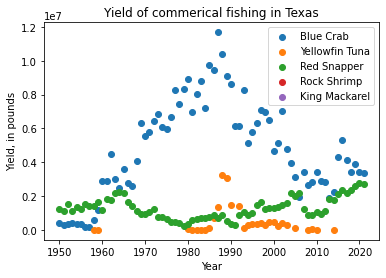

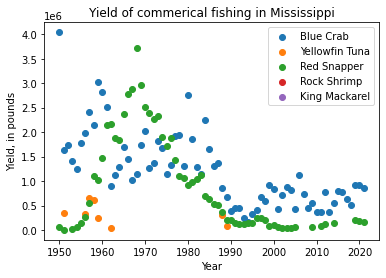

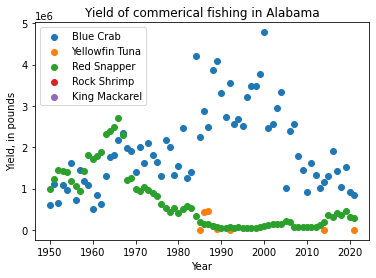

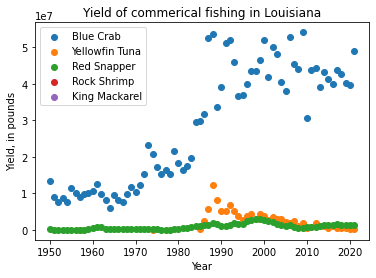

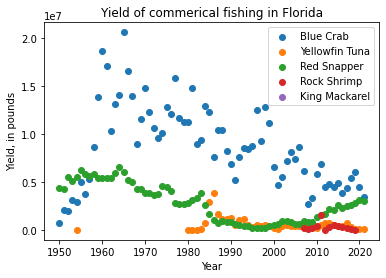

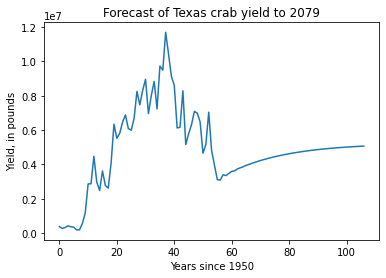

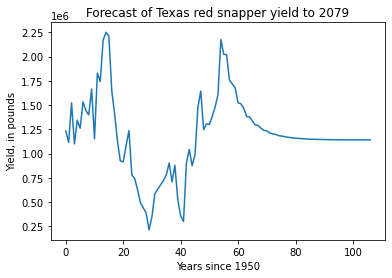

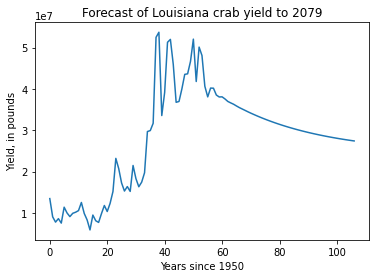

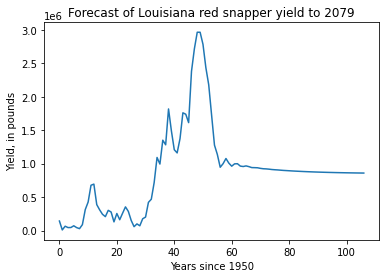

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


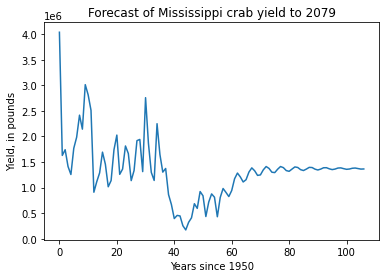

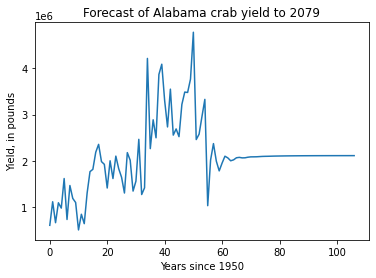

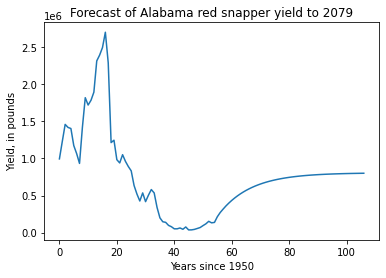

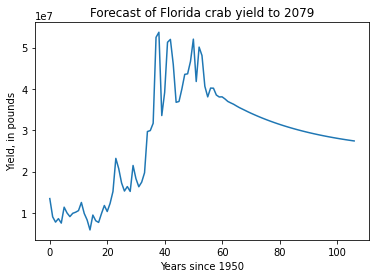

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


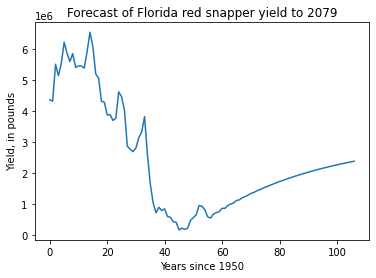

In [6]:
from ast import Lambda
import numpy as np
import pandas as pd
import flask
import matplotlib.pyplot as plt

import statsmodels.api as sm

# Load the data set from the special file.
data = np.load('FishData.txt.npy')

# Test: Did everything load?
data

# Separate the data by species. Each new array should only contain data
# about the particular species.
species = ['CRAB, BLUE', 'TUNA, YELLOWFIN', 'SNAPPER, RED', 'SHRIMP, ROCK',
           'MACKAREL, KING']

# These return the rows containing the indicated species.
crab = np.where(data[:, 2] == species[0])
tuna = np.where(data[:, 2] == species[1])
snap = np.where(data[:, 2] == species[2])
shrimp = np.where(data[:, 2] == species[3])
mack = np.where(data[:, 2] == species[4])

# Now separate.
crab_data = data[crab, :]
tuna_data = data[tuna, :]
snap_data = data[snap, :]
shrimp_data = data[shrimp, :]
mack_data = data[mack, :]

# These are the rows that correspond to an animal being fished in
# that state.
TX = [np.where((data[:, 1] == 'TEXAS') & (data[:, 2] == species[j]))
for j in range(0, 5)]

MS = [np.where((data[:, 1] == 'MISSISSIPPI') & (data[:, 2] == species[j]))
for j in range(0, 5)]

AL = [np.where((data[:, 1] == 'ALABAMA') & (data[:, 2] == species[j]))
for j in range(0, 5)]

LA = [np.where((data[:, 1] == 'LOUISIANA') & (data[:, 2] == species[j]))
for j in range(0, 5)]

FL = [np.where((data[:, 1] == 'FLORIDA-WEST') & (data[:, 2] == species[j]))
for j in range(0, 5)]

np.array(data[TX[0], 0], dtype = int)
np.array(data[TX[0], 3], dtype = int)

# Variable for labels.
species_labels = ['Blue Crab', 'Yellowfin Tuna', 'Red Snapper', 'Rock Shrimp',
                  'King Mackarel']

# Labels.
xlab = 'Year'
ylab = 'Yield, in pounds'

# Plot the counts.
# First, for Texas.
fig1 = plt.figure()
ax1 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[TX[k], 0], dtype = int), 
         np.array(data[TX[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Texas')
# ax1.ticklabel_format(style = 'plain')
plt.show()

# Other states follow.
fig2 = plt.figure()
ax2 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[MS[k], 0], dtype = int), 
         np.array(data[MS[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Mississippi')
# ax2.ticklabel_format(style = 'plain')
plt.show()

fig3 = plt.figure()
ax3 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[AL[k], 0], dtype = int), 
         np.array(data[AL[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Alabama')
# ax3.ticklabel_format(style = 'plain')
plt.show()

fig4 = plt.figure()
ax4 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[LA[k], 0], dtype = int), 
         np.array(data[LA[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Louisiana')
# ax4.ticklabel_format(style = 'plain')
plt.show()

fig5 = plt.figure()
ax5 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[FL[k], 0], dtype = int), 
         np.array(data[FL[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Florida')
# ax5.ticklabel_format(style = 'plain')
plt.show()

# As not all species are represented equally in each split,
# we aim to train a few time series models (likely ARIMA) to
# forecast future yields for blue crab and red snapper.

# We first split the data into a training set and a testing
# set. Train up to 2005, and test afterwards.
train = np.array(np.linspace(0, 55, 56), dtype = int)
test = np.array(np.linspace(56, 71, 16), dtype = int)

# Gather training data.
TX_crab_train = np.array(data[TX[0], 3][:, train], dtype = int)
TX_snap_train = np.array(data[TX[2], 3][:, train], dtype = int)

MS_crab_train = np.array(data[MS[0], 3][:, train], dtype = int)
# MS_snap_train = np.array(data[MS[2], 3][:, train], dtype = int)

AL_crab_train = np.array(data[AL[0], 3][:, train], dtype = int)
AL_snap_train = np.array(data[AL[2], 3][:, train], dtype = int)

LA_crab_train = np.array(data[LA[0], 3][:, train], dtype = int)
LA_snap_train = np.array(data[LA[2], 3][:, train], dtype = int)

FL_crab_train = np.array(data[FL[0], 3][:, train], dtype = int)
FL_snap_train = np.array(data[FL[2], 3][:, train], dtype = int)

# And now the testing data.
TX_crab_test = np.array(data[TX[0], 3][:, test], dtype = int)
TX_snap_test = np.array(data[TX[2], 3][:, test], dtype = int)

MS_crab_test = np.array(data[MS[0], 3][:, test], dtype = int)
# MS_snap_test = np.array(data[MS[2], 3][:, test[0:-2]], dtype = int)

AL_crab_test = np.array(data[AL[0], 3][:, test], dtype = int)
AL_snap_test = np.array(data[AL[2], 3][:, test], dtype = int)

LA_crab_test = np.array(data[LA[0], 3][:, test], dtype = int)
LA_snap_test = np.array(data[LA[2], 3][:, test], dtype = int)

FL_crab_test = np.array(data[FL[0], 3][:, test], dtype = int)
FL_snap_test = np.array(data[FL[2], 3][:, test], dtype = int)

# Create the first ARIMA model.
model1 = sm.tsa.ARIMA(TX_crab_train[0, :], order = (3, 0, 2))
results1 = model1.fit()
preds1 = results1.predict(start = 56, end = 106)
plt.plot(np.concatenate((TX_crab_train[0, :], preds1)))
plt.title('Forecast of Texas crab yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()

# Now do the others.
model2 = sm.tsa.ARIMA(TX_snap_train[0, :], order = (3, 0, 2))
results2 = model2.fit()
preds2 = results2.predict(start = 56, end = 106)
plt.plot(np.concatenate((TX_snap_train[0, :], preds2)))
plt.title('Forecast of Texas red snapper yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()

model1 = sm.tsa.ARIMA(LA_crab_train[0, :], order = (3, 0, 2))
results1 = model1.fit()
preds1 = results1.predict(start = 56, end = 106)
plt.plot(np.concatenate((LA_crab_train[0, :], preds1)))
plt.title('Forecast of Louisiana crab yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()

model2 = sm.tsa.ARIMA(LA_snap_train[0, :], order = (3, 0, 2))
results2 = model2.fit()
preds2 = results2.predict(start = 56, end = 106)
plt.plot(np.concatenate((LA_snap_train[0, :], preds2)))
plt.title('Forecast of Louisiana red snapper yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()

model1 = sm.tsa.ARIMA(MS_crab_train[0, :], order = (3, 0, 2))
results1 = model1.fit()
preds1 = results1.predict(start = 56, end = 106)
plt.plot(np.concatenate((MS_crab_train[0, :], preds1)))
plt.title('Forecast of Mississippi crab yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()

# model2 = sm.tsa.ARIMA(MS_snap_train[0, :], order = (3, 0, 2))
# results2 = model2.fit()
# preds2 = results2.predict(start = 56, end = 106)
# plt.plot(np.concatenate((MS_snap_train[0, :], preds2)))
# plt.show()

model1 = sm.tsa.ARIMA(AL_crab_train[0, :], order = (3, 0, 2))
results1 = model1.fit()
preds1 = results1.predict(start = 56, end = 106)
plt.plot(np.concatenate((AL_crab_train[0, :], preds1)))
plt.title('Forecast of Alabama crab yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()

model2 = sm.tsa.ARIMA(AL_snap_train[0, :], order = (3, 0, 2))
results2 = model2.fit()
preds2 = results2.predict(start = 56, end = 106)
plt.plot(np.concatenate((AL_snap_train[0, :], preds2)))
plt.title('Forecast of Alabama red snapper yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()

model1 = sm.tsa.ARIMA(LA_crab_train[0, :], order = (3, 0, 2))
results1 = model1.fit()
preds1 = results1.predict(start = 56, end = 106)
plt.plot(np.concatenate((LA_crab_train[0, :], preds1)))
plt.title('Forecast of Florida crab yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()

model2 = sm.tsa.ARIMA(FL_snap_train[0, :], order = (3, 0, 2))
results2 = model2.fit()
preds2 = results2.predict(start = 56, end = 106)
plt.plot(np.concatenate((FL_snap_train[0, :], preds2)))
plt.title('Forecast of Florida red snapper yield to 2079')
plt.xlabel('Years since 1950')
plt.ylabel('Yield, in pounds')
plt.show()